## Hospital Capacity Simulator

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import seaborn as sns

from numpy import random

from ipywidgets import interact

from IPython.display import display

# sns.set(color_codes=True)
# sns.set(rc={'figure.figsize':(10,10)})

## Variables

Estimated Statistics for `Planned` and `Unplanned`:

In [2]:
def b(Total): return
def p(Mean, STD): return
def f(Percent): return

In [3]:
num_beds = widgets.interactive(b, Total=widgets.IntSlider(value=312, min=100, max=500));

In [4]:
planned = widgets.interactive(p, Mean=widgets.FloatSlider(value=36.0, min=0.0, max=120.0, step=0.5), 
                 STD=widgets.FloatSlider(value=8.0, min=0.0, max=60.0, step=0.5));

In [5]:
unplanned = widgets.interactive(p, Mean=widgets.FloatSlider(value=48.0, min=0.0, max=120.0, step=0.5), 
                 STD=widgets.FloatSlider(value=12.0, min=0.0, max=60.0, step=0.5));

In [6]:
unplan_adm_rate = widgets.interactive(f, Percent=widgets.FloatSlider(value=.2, min=0.0, max=1.0, step=0.05));

In [7]:
display(widgets.VBox([widgets.Label('Number of Beds:'), num_beds,
              widgets.Label('Planned LOS:'), planned, 
              widgets.Label('Unplanned LOS:'), unplanned,
              widgets.Label('Unplanned Admission Rate:'), unplan_adm_rate]))

### Planned Admissions

In [8]:
plan_hrly_means = np.array([[0.2, 0.2, 0.2, 0.2, 0.2, 3.5, 8, 13, 15, 15, 12, 11, 13, 12, 12, 11, 9, 6, 3, 1, 0.2, 0.2, 0.2, 0.2]]).T

plan_hrly_std = np.array([[2.5, 2.1, 1.7, 1.6, 1.4, 1.35, 1.2, 3.5, 4.9, 5.7, 5.5, 4.4, 4.6, 4.8, 4.7, 4.6, 4.3, 4.2, 4.3, 
                            5, 5.5, 4.2, 3.3, 2.9]]).T

plan_hrly = np.hstack((plan_hrly_means, plan_hrly_std))

planned_df = pd.DataFrame(data=plan_hrly, columns=["hourly means", "hourly std"])

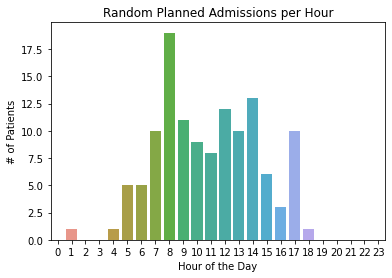

In [9]:
planned = [random.poisson(lam=m.item()) for m in plan_hrly_means]
ax = sns.barplot(x=np.arange(0,24,1), y=planned);
ax.set(xlabel='Hour of the Day', ylabel='# of Patients')
ax.set_title("Random Planned Admissions per Hour")
plt.show();

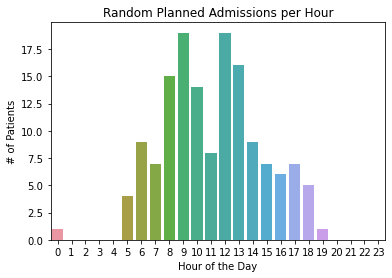

In [10]:
planned = [random.poisson(lam=m.item()) for m in plan_hrly_means]
ax = sns.barplot(x=np.arange(0,24,1), y=planned);
ax.set(xlabel='Hour of the Day', ylabel='# of Patients')
ax.set_title("Random Planned Admissions per Hour")
plt.show();

### Unplanned Admissions Per Hour

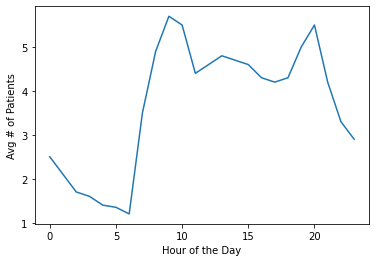

In [11]:
unplan_hrly_means = np.array([2.5, 2.1 ,1.7, 1.6, 1.4, 1.35, 1.2, 3.5, 4.9, 5.7, 5.5, 4.4, 4.6, 4.8, 4.7, 4.6, 4.3, 4.2, 4.3, 5,
                         5.5, 4.2, 3.3, 2.9])

unplan_hrly_std = np.array([0.05, 0.05, 0.05, 0.05, 0.05, 0.875, 1.5, 3, 2.75, 2.5, 3.25, 3.25, 3, 2.75, 3, 1.75, 2, 1, 0.75, 0.25, 
                        0.05, 0.05, 0.05, 0.05])

unplan_hrly = np.hstack((unplan_hrly_means[:,None], unplan_hrly_std[:,None]))

unplanned_df = pd.DataFrame(data=unplan_hrly, 
                         columns=["hourly means", "hourly std"])

ax = unplanned_df['hourly means'].plot();
ax.set(xlabel='Hour of the Day', ylabel='Avg # of Patients');


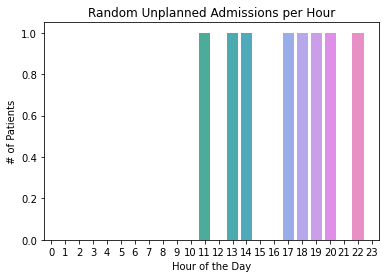

In [12]:
unplanned = [int(random.poisson(lam=m)*unplan_adm_rate.kwargs['Percent']) for m in unplan_hrly_means]
ax = sns.barplot(x=np.arange(0,24,1), y=unplanned);
ax.set(xlabel='Hour of the Day', ylabel='# of Patients')
ax.set_title("Random Unplanned Admissions per Hour")
plt.show();

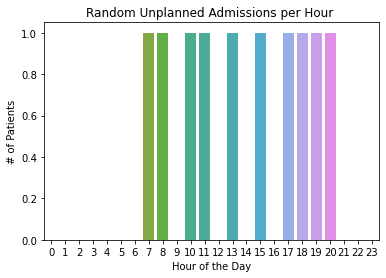

In [13]:
unplanned = [int(random.poisson(lam=m)*unplan_adm_rate.kwargs['Percent']) for m in unplan_hrly_means]

ax = sns.barplot(x=np.arange(0,24,1), y=unplanned);
ax.set(xlabel='Hour of the Day', ylabel='# of Patients')
ax.set_title("Random Unplanned Admissions per Hour ")
plt.show()

### Hospital Capacity

 ## Testing

In [14]:
import networkx as nx

In [15]:
# wrap a few graph generation functions so they have the same signature

def random_lobster(n, m, k, p):
    return nx.random_lobster(n, p, p / m)

def powerlaw_cluster(n, m, k, p):
    return nx.powerlaw_cluster_graph(n, m, p)

def erdos_renyi(n, m, k, p):
    return nx.erdos_renyi_graph(n, p)

def newman_watts_strogatz(n, m, k, p):
    return nx.newman_watts_strogatz_graph(n, k, p)

def plot_random_graph(n, m, k, p, generator):
    g = generator(n, m, k, p)
    nx.draw(g)
    plt.show()

In [16]:
interact(plot_random_graph, n=(2,30), m=(1,10), k=(1,10), p=(0.0, 1.0, 0.001),
         generator={
             'lobster': random_lobster,
             'power law': powerlaw_cluster,
             'Newman-Watts-Strogatz': newman_watts_strogatz,
             u'Erdős-Rényi': erdos_renyi,
         });

interactive(children=(IntSlider(value=16, description='n', max=30, min=2), IntSlider(value=5, description='m',…

### Output Widget

In [17]:
# out = widgets.Output(layout={'border': '1px solid black'})
# out

Output(layout=Layout(border='1px solid black'))

In [18]:
# def run():
#     with out:
#         for i in range(10):
#             print(i, 'Hello world!')
            
# run()